# Artificial images from 3D data
This example shows how to generate artificial images from a given 3D curve given through a set a points.

In [7]:
from icpReconstructor.utils import fromWorld2Img, camera_folder_to_params
from skimage.morphology import disk, binary_dilation
import numpy as np
import torch

#### Load the data from the provided npy file.

In [8]:
p_ = np.load('simulated_ctcr.npy')
p = torch.from_numpy(p_)


#### Load the camera calibration parameters

In [9]:
camera_folder = "camera_calibration_files\\"
cam_params = camera_folder_to_params(camera_folder, 2)

#### Project the 3D data to the images and round the values to the nearest integer.

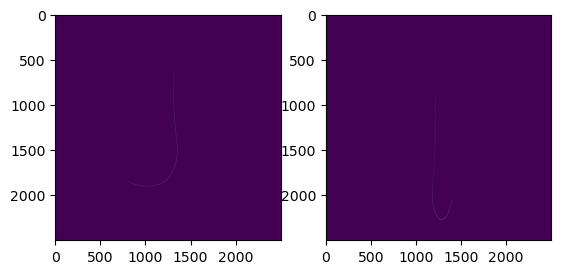

In [10]:
import matplotlib.pyplot as plt

p0 = fromWorld2Img(p.T, **cam_params[0]).detach().numpy()
p1 = fromWorld2Img(p.T, **cam_params[1]).detach().numpy()

p0_r = np.int32(np.round(p0))
# Use only the points that are within image 0
p0_r_cl = p0_r[:, ((p0_r >= 0) & (p0_r < 2500)).all(0)]
im0 = np.zeros((2500, 2500))

p1_r = np.int32(np.round(p1))
# Use only the points that are within image 1
p1_r_cl = p1_r[:, ((p1_r >= 0) & (p1_r < 2500)).all(0)]
im1 = np.zeros((2500, 2500))

im0[p0_r_cl[1, :], p0_r_cl[0, :]] = 1
im1[p1_r_cl[1, :], p1_r_cl[0, :]] = 1

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(im0)
ax1.imshow(im1)
plt.show()

#### Using dilation for giving the lines a thickness.

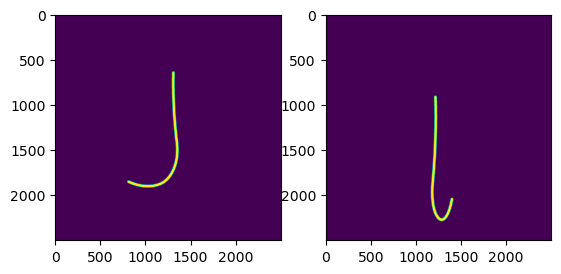

: 

In [12]:
im0_b = binary_dilation(im0, footprint=disk(15))
im1_b = binary_dilation(im1, footprint=disk(15))

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(im0_b)
ax1.imshow(im1_b)
plt.show()